In [ ]:
import keras
keras.__version__

'2.4.3'


#### Dataset Discription
The problem we are going to look at in this post is the International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.



Epoch 1/150
94/94 - 1s - loss: 0.0302
Epoch 2/150
94/94 - 0s - loss: 0.0142
Epoch 3/150
94/94 - 0s - loss: 0.0118
Epoch 4/150
94/94 - 0s - loss: 0.0105
Epoch 5/150
94/94 - 0s - loss: 0.0093
Epoch 6/150
94/94 - 0s - loss: 0.0078
Epoch 7/150
94/94 - 0s - loss: 0.0066
Epoch 8/150
94/94 - 0s - loss: 0.0056
Epoch 9/150
94/94 - 0s - loss: 0.0046
Epoch 10/150
94/94 - 0s - loss: 0.0038
Epoch 11/150
94/94 - 0s - loss: 0.0032
Epoch 12/150
94/94 - 0s - loss: 0.0028
Epoch 13/150
94/94 - 0s - loss: 0.0025
Epoch 14/150
94/94 - 0s - loss: 0.0023
Epoch 15/150
94/94 - 0s - loss: 0.0021
Epoch 16/150
94/94 - 0s - loss: 0.0021
Epoch 17/150
94/94 - 0s - loss: 0.0022
Epoch 18/150
94/94 - 0s - loss: 0.0021
Epoch 19/150
94/94 - 0s - loss: 0.0021
Epoch 20/150
94/94 - 0s - loss: 0.0021
Epoch 21/150
94/94 - 0s - loss: 0.0021
Epoch 22/150
94/94 - 0s - loss: 0.0021
Epoch 23/150
94/94 - 0s - loss: 0.0021
Epoch 24/150
94/94 - 0s - loss: 0.0021
Epoch 25/150
94/94 - 0s - loss: 0.0022
Epoch 26/150
94/94 - 0s - loss: 0.

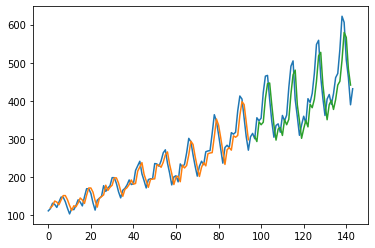

In [ ]:
import numpy
import math
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSprop')
model.fit(trainX, trainY, epochs=150, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()